<a href="https://colab.research.google.com/github/Sandwhaletree/2023.05_Tibame/blob/main/A13_%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%E6%8C%87%E5%B0%8E_%E9%99%B3%E5%AE%87%E6%98%A5/C03_Data_Visualization__%E7%AF%84%E4%BE%8B_0731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url='https://github.com/Sandwhaletree/2023.05_Tibame/raw/main/A13_%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%E6%8C%87%E5%B0%8E_%E9%99%B3%E5%AE%87%E6%98%A5/file/sample-salesv3.xlsx'
urlretrieve(url,"sample-salesv3.xlsx")

('sample-salesv3.xlsx', <http.client.HTTPMessage at 0x7feebe621660>)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("sample-salesv3.xlsx")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


# 數據包括 2014 年的銷售交易額。

將總結這些數據,列出前十名客戶的採購次數和交易額。 並在繪圖時對各列進行重命名。

In [3]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()

top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

<ipython-input-3-e417dfc57ee5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})


In [4]:
# 顯示出排序後的資料
top_10.head()

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81


數據以簡單的表格形式呈現,我們再來看一下如何將數據繪製成條形圖。

如前所述,Matplotlib 具備多種不同風格,可用於渲染圖表。

可以使用 plt.style.available 查看你的系統可用的風格。

可以使用 plt.style.use 使用風格

In [5]:
plt.style.use('ggplot')

<Axes: ylabel='Name'>

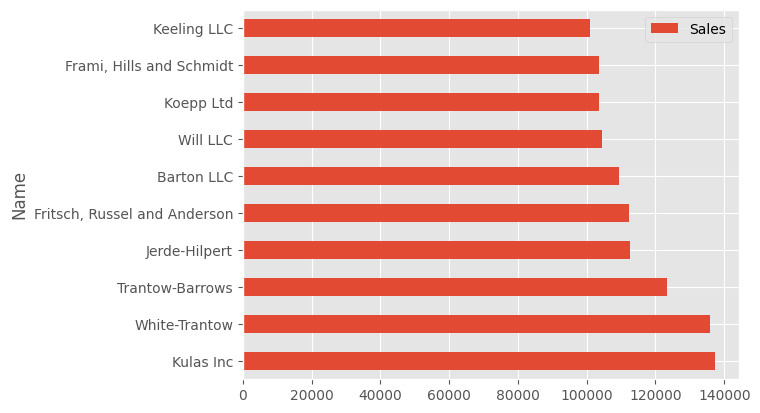

In [6]:
#第一步就是使用標準 pandas 繪圖函數繪製數據:
top_10.plot(kind='barh', y="Sales", x="Name")

# 自訂圖表

如果你對該圖表的重要部分都很滿意,那麼下一步就是對它執行自定義。

一些自定義(如添加標題和標籤)可以使用 pandas plot 函數輕鬆搞定。


<Axes: ylabel='Name'>

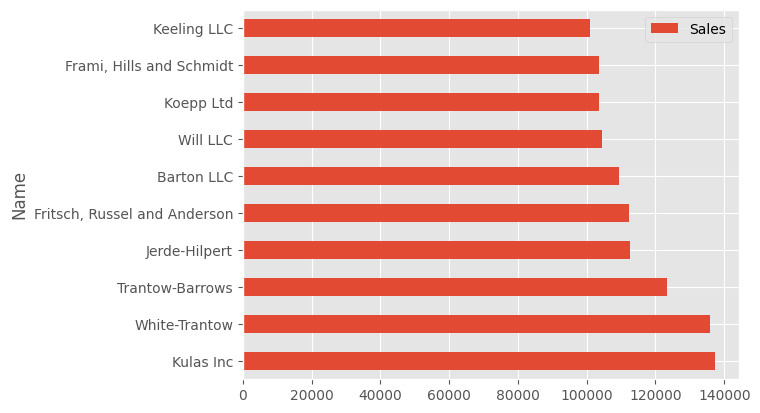

In [7]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

# 通過 ax 或 fig 物件可以執行任何自定義

生成的圖表和原始圖表基本一樣,不過我們向 plt.subplots() 添加了一個額外的調用,並將 ax 傳輸至繪圖函數。

通過使用命名慣例,調整別人的解決方案適應自己的需求變得更加直接簡單了。

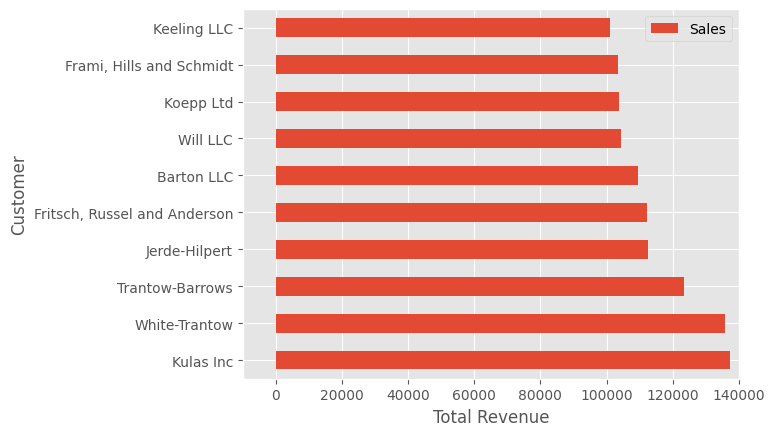

In [8]:
#調整一些軸標籤

fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

[Text(0.5, 1.0, '2014 Revenue'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Customer')]

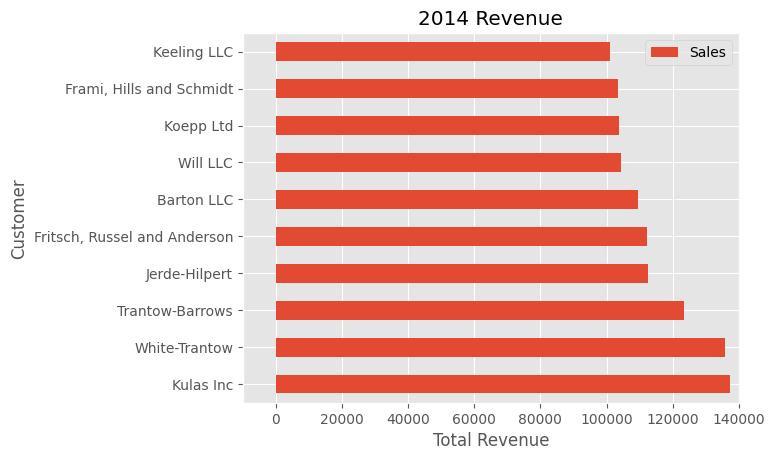

In [9]:
#另一種改變方式
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

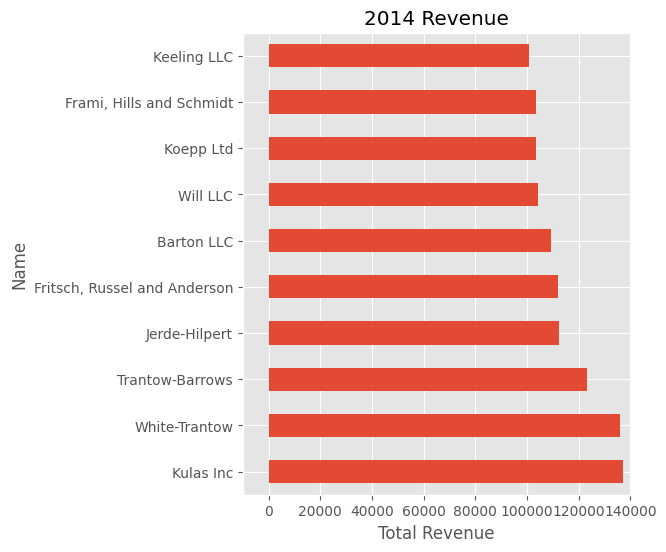

In [10]:
#使用 plt.subplots() 函數可以定義圖像尺寸,一般以英寸為單位。
#使用 ax.legend().set_visible(False) 移除圖例。

fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

In [11]:
#總收益額的格式。 Matplotlib 可以使用 FuncFormatter 解決這一問題。
#該函數用途多樣,允許使用者定義的函數應用到值,並返回格式美觀的字串

def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

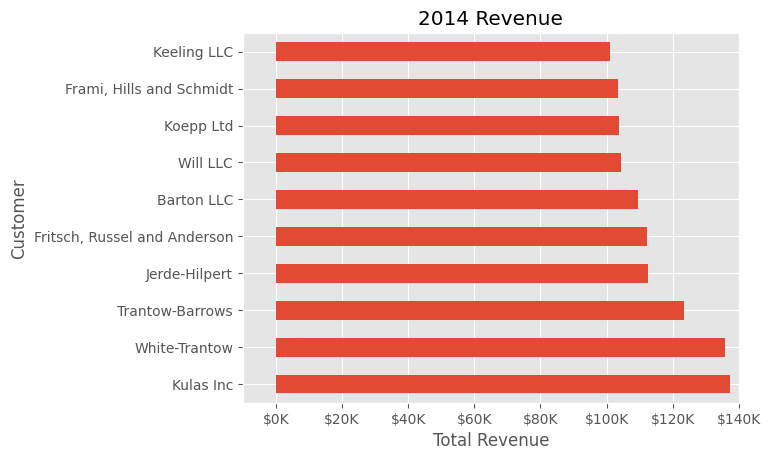

In [12]:
#查看新圖

fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

# 自定義特徵是向圖表添加註釋

使用 ax.axvline() 畫垂直線,

使用 ax.text() 添加自訂文本

可以畫一條表示平均值的線,包括代表 3 個新客戶的標籤

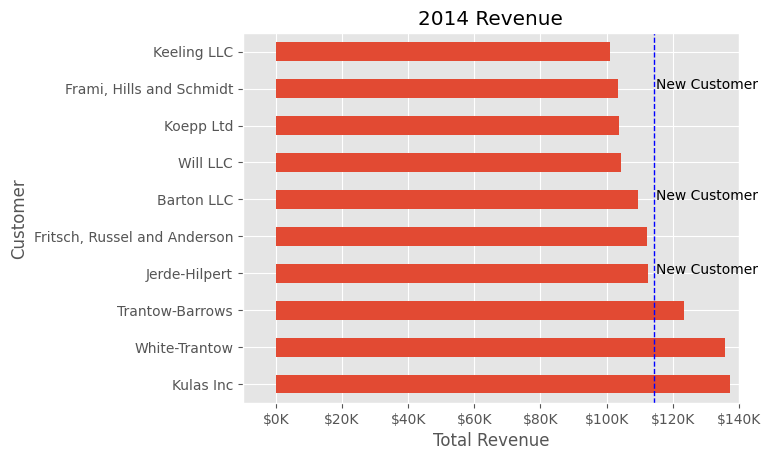

In [13]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)


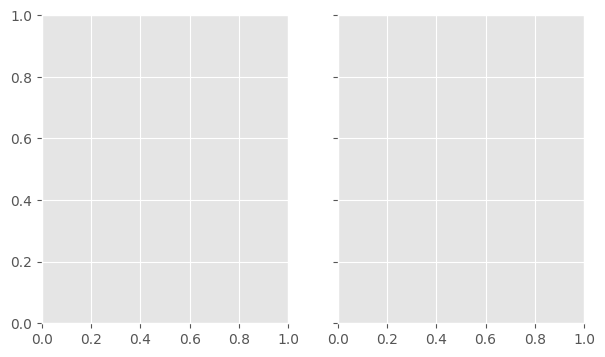

In [14]:
#在同一個圖像上放置兩個表
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

#使用 nrows 和 ncols 指定大小

#使用 sharey=True 以使 y 軸共用相同的標籤。

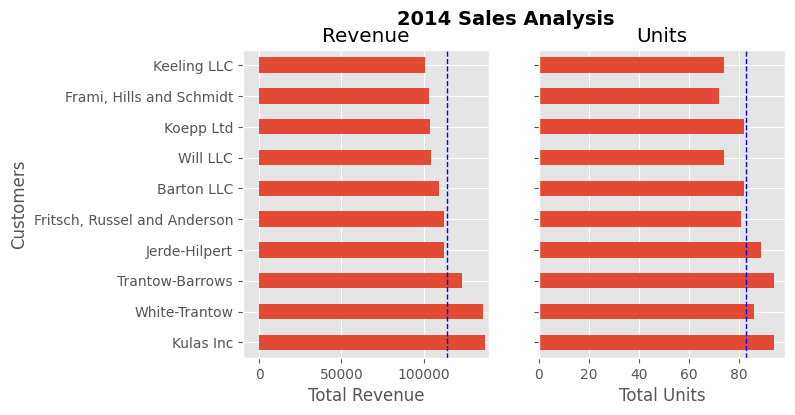

In [15]:


# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)


In [16]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

#用 fig.canvas.get_supported_filetypes() 檢視系統支援的檔案格式: